# Accuracy Plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'


In [2]:
accuracy_data = "figures/testing_accuracy/per_position/per_position_data_0.5.csv"
mod_csv = "../training/reference/mod_file.csv"
savefig = "figures/testing_accuracy/accuracy_plot.svg"


In [3]:
mod_df = pd.read_csv(mod_csv)
acc_df = pd.read_csv(accuracy_data)
acc_df["pos"] = acc_df["reference_index"] + 1
acc_df = pd.merge(acc_df, mod_df, on=["contig", "pos", "strand"])

In [4]:
plot_df = acc_df[["contig", "pos", "reference_index", "strand", "accuracy", "mod"]]
cmap="viridis"
norm=None
show_numbers=True
urls=False

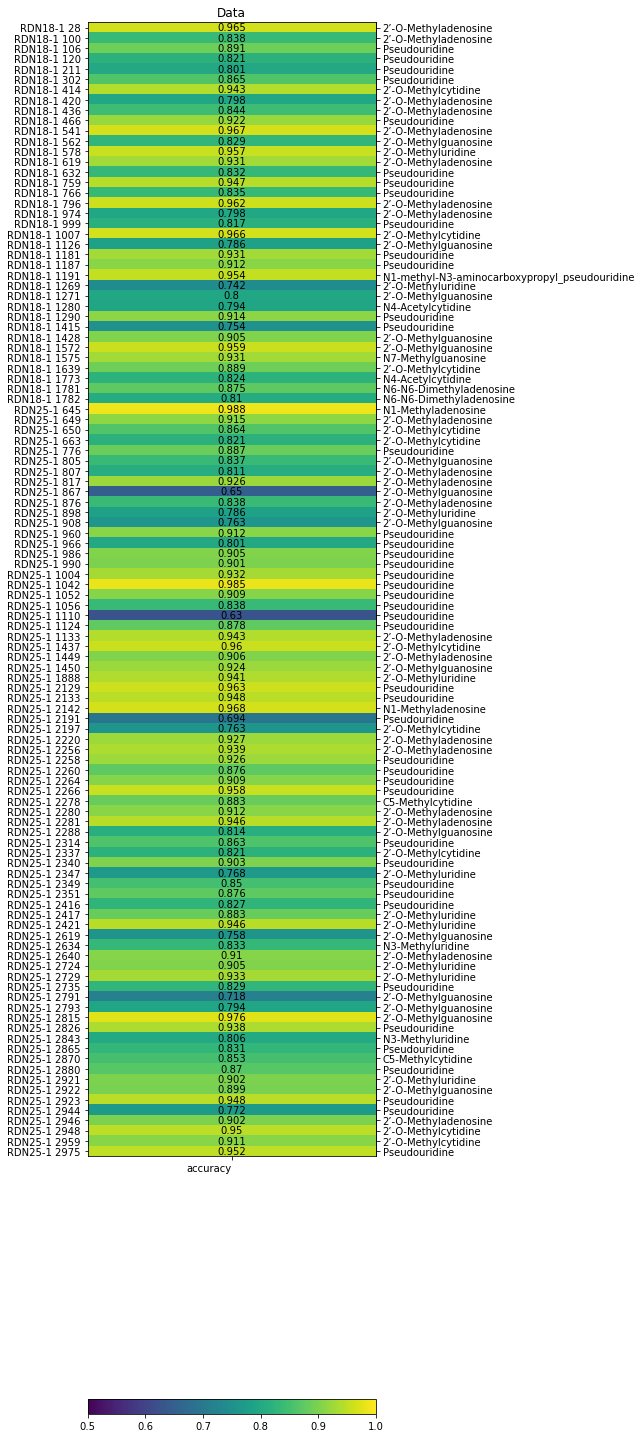

In [5]:
cbarlabel = "Accuracy"
# cmap = "RdYlGn"
# cmap = "viridis"

not_columns = ['contig', 'position', 'strand', 'change_from', 'change_to', 'mod',
               'pos', 'percent', 'reference_index', 'delta1_below', 'delta1_above',
               'delta2_below', 'delta2_above', 'delta3_below', 'delta3_above',
               'delta4_below', 'delta4_above', 'delta', 'in_2prime', 'in_pseudo',
               'in_unknown', "pseudo_in_other", "2prime_in_other"]
x_labels = [x for x in plot_df.columns if x not in not_columns]
y_labels = [" ".join([str(x) for x in plot_df[["contig", "pos"]].loc[i]]) for i in plot_df.index]
y_labels2 = [str(plot_df[["mod"]].loc[i][0]) for i in plot_df.index]

data = plot_df[x_labels]

fig, ax = plt.subplots(figsize=(10, 30))
plt.subplots_adjust(top=0.95, bottom=0.2, right=0.6, left=0.2)

im = ax.imshow(data, aspect="auto", cmap=cmap, norm=norm, vmin=0.5, vmax=1)
cbar = ax.figure.colorbar(im, ax=ax, orientation="horizontal")
# cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

# We want to show all ticks...
ax.set_xticks(np.arange(len(x_labels)))
ax.set_yticks(np.arange(len(y_labels)))
ax.set_xticklabels(x_labels)
ax.set_yticklabels(y_labels)
ax2 = ax.secondary_yaxis(location="right")
ax2.set_yticks(np.arange(len(y_labels)))
ax2.set_yticklabels(y_labels2)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
if show_numbers:
    for x, x_label in enumerate(data.columns):
        for y, y_label in enumerate(data.index):
            #         print(data.loc[y_label, x_label])
            mod_name = "_".join([str(x) for x in plot_df[["contig", "pos", "strand"]].loc[y_label]])
            url = None
            if urls:
                url = urls[mod_name]
            text = ax.text(x, y, round(data.loc[y_label, x_label], 3),
                           ha="center", va="center", color="black",
                           url=url)

ax.set_title("Data")
# option to save figure or just show it
if savefig is not None:
#     plt.savefig(savefig, dpi=300)
    plt.savefig(savefig)
else:
    plt.show()
